# Parte 1:

# 1.	Reporte detallado de missing data para todas las columnas. 

# 2.	Para cada columna especificar qué tipo de modelo se utilizará (solo el nombre y el porqué) y qué valores se le darán a todos los missing values. (Ej. Imputación sectorizada por la moda, bins, y cualquier otro método visto anteriormente). 

# 3.	Reporte de qué filas están completas 

# 4.	Utilizar los siguientes métodos para cada columna que contiene missing values

1. Limpieza de los Missing Values

In [1]:
import numpy as np
import pandas as pd

In [118]:
data = pd.read_csv('titanic_MD.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


Cambiar los vacios, los ? por NaN

In [119]:
 # Cambiar los ? por NaN
cols = []
val = []
for col in data.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(data[col].str.contains(r'\b\0\b').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,0
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [120]:
# cambia los ? y espacios vacios
data.replace(r'\?', np.nan, regex = True, inplace = True)

In [121]:
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [122]:
# Aproximar la edad para dejarlo en enteros
data['Age'] = round(data['Age'])

In [123]:
# tener todo en dos decimales
data['Fare'] = round(data['Fare'], 2)

In [124]:
# Ver el % de missing values en las columnas. 
pct = pd.DataFrame(data.isna().sum()/data.shape[0], columns = ['pct']).reset_index()
pct

,index,pct
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.278689
5,Age,0.136612
6,SibSp,0.016393
7,Parch,0.065574
8,Ticket,0.000000
9,Fare,0.043716


In [ ]:
# Sólo el sex y la age sobrepasan el 10%, pero considero que no es necesario eliminarlas. 

# Imputaciones

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Sex:

In [11]:
data_imputaciones = pd.DataFrame(imp_mode.fit_transform(data[['Sex']]), columns = ['Sex_mode'])

Age:

In [12]:
data_imputaciones['Age_mean'] = imp_mean.fit_transform(data[['Age']])
data_imputaciones['Age_mean'] = round(data_imputaciones['Age_mean'], 2)

In [13]:
data_imputaciones['Age_mode'] = imp_mode.fit_transform(data[['Age']])

In [14]:
data_imputaciones['Age_median'] = imp_median.fit_transform(data[['Age']])

SibSp

In [15]:
data_imputaciones['SibSp_mean'] = imp_mean.fit_transform(data[['SibSp']])
data_imputaciones['SibSp_mean'] = round(data_imputaciones['SibSp_mean'])

In [16]:
data_imputaciones['SibSp_mode'] = imp_mode.fit_transform(data[['SibSp']])
data_imputaciones['SibSp_mode'] = round(data_imputaciones['SibSp_mode'])

In [17]:
data_imputaciones['SibSp_median'] = imp_median.fit_transform(data[['SibSp']])
data_imputaciones['SibSp_median'] = round(data_imputaciones['SibSp_median'])

Parch

In [18]:
data_imputaciones['Parch_mean'] = imp_mean.fit_transform(data[['Parch']])
data_imputaciones['Parch_mean'] = round(data_imputaciones['Parch_mean'])

In [19]:
data_imputaciones['Parch_mode'] = imp_mode.fit_transform(data[['Parch']])
data_imputaciones['Parch_mode'] = round(data_imputaciones['Parch_mode'])

In [20]:
data_imputaciones['Parch_median'] = imp_median.fit_transform(data[['Parch']])
data_imputaciones['Parch_median'] = round(data_imputaciones['Parch_median'])

Fare

In [21]:
data_imputaciones['Fare_mean'] = imp_mean.fit_transform(data[['Fare']])
data_imputaciones['Fare_mean'] = round(data_imputaciones['Fare_mean'], 2)

In [22]:
data_imputaciones['Fare_mode'] = imp_mode.fit_transform(data[['Fare']])

In [23]:
data_imputaciones['Fare_median'] = imp_median.fit_transform(data[['Fare']])

Embarked

In [24]:
data_imputaciones['Embarked_mode'] = imp_mode.fit_transform(data[['Embarked']])

In [125]:
data_imputaciones

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,Fare_mode,Fare_median,Embarked_mode,age_lm,SibSp_lm,Parch_lm,Fare_lm
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,71.28,71.28,71.28,C,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,53.10,53.10,53.10,S,39.0,1.0,0.0,73.27
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,51.86,51.86,51.86,S,45.0,0.0,0.0,46.76
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,16.70,16.70,16.70,S,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,26.55,26.55,26.55,S,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,female,47.00,47.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,78.96,26.55,56.93,S,NaN,NaN,NaN,NaN
179,male,35.69,24.0,35.5,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00,S,NaN,NaN,NaN,NaN
180,female,56.00,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,83.16,83.16,83.16,S,NaN,NaN,NaN,NaN
181,male,19.00,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,30.00,30.00,30.00,S,NaN,NaN,NaN,NaN


# Regresion lineal

In [26]:
from sklearn.linear_model import LinearRegression

In [126]:
data_lm = data.dropna()
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S


In [127]:
def linear_regression(x,y): 
    lm = LinearRegression()
    lm.fit(x,y)
    y_hat = lm.predict(x)
    error = (1/2*np.mean(y_hat - y ) **2)
    
    #creación de un data frame
    df_dict = { 'PassengerId':data_lm.dropna().PassengerId, 'y_hat': y_hat }
    df = pd.DataFrame(df_dict)
    return(lm)

In [128]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S


Age

In [129]:
age_lm = linear_regression(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1), data_lm['Age'].dropna())

In [130]:
age_lm

LinearRegression()

In [131]:
data_lm['age_lm'] = age_lm.predict(data_lm.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1))




/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3445699713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['age_lm'] = age_lm.predict(data_lm.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1))


In [132]:
data_lm['age_lm']

1      38.944421
2      45.389996
5      29.646841
9      38.782896
10     48.795700
         ...    
171    31.647901
172    17.197045
173    31.883324
174    28.754026
177    45.420960
Name: age_lm, Length: 100, dtype: float64

SibSp

In [133]:
SibSp_lm = linear_regression(data_lm.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm', 'SibSp'], axis = 1), data_lm['SibSp'].dropna())

In [134]:
SibSp_lm

LinearRegression()

In [135]:
data_lm['SibSp_lm'] = SibSp_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp'], axis = 1))



/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/337794502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['SibSp_lm'] = SibSp_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp'], axis = 1))


In [136]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_lm,SibSp_lm
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,38.944421,0.543552
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,45.389996,0.339006
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,29.646841,0.225671
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,38.782896,0.485933
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,48.795700,0.315236


Parch

In [137]:
Parch_lm = linear_regression(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch'], axis = 1), data_lm['Parch'].dropna())

In [138]:
Parch_lm

LinearRegression()

In [139]:
data_lm['Parch_lm'] = Parch_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch'], axis = 1))



/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/1511296534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['Parch_lm'] = Parch_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch'], axis = 1))


In [140]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_lm,SibSp_lm,Parch_lm
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,38.944421,0.543552,0.311611
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,45.389996,0.339006,0.168012
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,29.646841,0.225671,0.298780
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,38.782896,0.485933,0.061703
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,48.795700,0.315236,0.561392


Fare

In [141]:
Fare_lm = linear_regression(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch_lm', 'Fare'], axis = 1), data_lm['Fare'].dropna())

In [142]:
Fare_lm

LinearRegression()

In [143]:
data_lm['Fare_lm'] = Fare_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch_lm', 'Fare'], axis = 1))



/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/205073982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['Fare_lm'] = Fare_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch_lm', 'Fare'], axis = 1))


In [144]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_lm,SibSp_lm,Parch_lm,Fare_lm
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,38.944421,0.543552,0.311611,73.268074
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,45.389996,0.339006,0.168012,46.757499
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,29.646841,0.225671,0.298780,11.891565
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,38.782896,0.485933,0.061703,81.799576
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,48.795700,0.315236,0.561392,62.066123


In [145]:
data_imputaciones['age_lm'] = round(data_lm['age_lm'])

In [146]:
data_imputaciones['SibSp_lm'] = round(data_lm['SibSp_lm'])

In [147]:
data_imputaciones['Parch_lm'] = round(data_lm['Parch_lm'])

In [148]:
data_imputaciones['Fare_lm'] = round(data_lm['Fare_lm'], 2)

In [149]:
# Son aquellos que el modelo no predijo, ya que contaba con variables nan.
data_imputaciones.isna().sum()

Sex_mode          0
Age_mean          0
Age_mode          0
Age_median        0
SibSp_mean        0
SibSp_mode        0
SibSp_median      0
Parch_mean        0
Parch_mode        0
Parch_median      0
Fare_mean         0
Fare_mode         0
Fare_median       0
Embarked_mode     0
age_lm           83
SibSp_lm         83
Parch_lm         83
Fare_lm          83
dtype: int64

In [150]:
data_imputaciones

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,Fare_mode,Fare_median,Embarked_mode,age_lm,SibSp_lm,Parch_lm,Fare_lm
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,71.28,71.28,71.28,C,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,53.10,53.10,53.10,S,39.0,1.0,0.0,73.27
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,51.86,51.86,51.86,S,45.0,0.0,0.0,46.76
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,16.70,16.70,16.70,S,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,26.55,26.55,26.55,S,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,female,47.00,47.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,78.96,26.55,56.93,S,NaN,NaN,NaN,NaN
179,male,35.69,24.0,35.5,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00,S,NaN,NaN,NaN,NaN
180,female,56.00,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,83.16,83.16,83.16,S,NaN,NaN,NaN,NaN
181,male,19.00,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,30.00,30.00,30.00,S,NaN,NaN,NaN,NaN


# Idea para llenar datos con la regresión, pero de igual forma, como no todos los que genero con la lm, son aquellos que exactamente tienen nan en sus respectivas columnas, para poder imputar un valor, volvería a hacer media, moda o mediana para pone ese valor.

In [172]:
tabla_edad_ = data['Age']
tabla_edad_

0      38.0
1      35.0
2      54.0
3       NaN
4      58.0
       ... 
178    47.0
179     NaN
180    56.0
181    19.0
182     NaN
Name: Age, Length: 183, dtype: float64

In [173]:
tabla_edad_ = pd.DataFrame(np.where(tabla_edad_.isna(), np.mean(data_imputaciones['age_lm']), tabla_edad_))


In [175]:
# El valor 36.13 es la media, de mi regresión linal, pero con sólo 100 datos porque son aquellas filas
# que no contaban con ningún nan a lo largo de ellas. 
tabla_edad_

,0
0,38.00
1,35.00
2,54.00
3,36.13
4,58.00
...,...
178,47.00
179,36.13
180,56.00
181,19.00


# Percentiles

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
data_pc = data.dropna()
data_pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S
...,...,...,...,...,...,...,...,...,...,...,...,...
171,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.50,B69,S
172,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.48,E121,S
173,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.16,E49,C
174,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0.0,1.0,PC 17592,39.40,D28,S


AGE

In [192]:
pl = np.percentile(data_pc['Age'], 5)
pu = np.percentile(data_pc['Age'], 95)
print(pl,pu)

13.850000000000001 61.0


<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

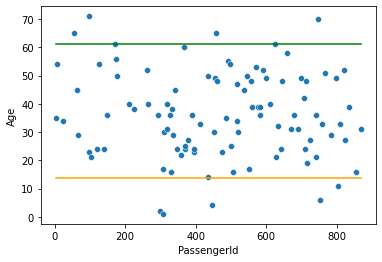

In [181]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['Age'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

DROP VALUES

In [182]:
df_sd = data_pc[(data_pc['Age']>=pl) & (data_pc['Age']<=pu)]

In [183]:
df_sd[['Age']].describe()

,Age
count,91.000000
mean,36.450549
std,12.305612
min,14.000000
25%,26.000000
50%,36.000000
75%,48.000000
max,61.000000


In [193]:
data_pc['Age_drop'] = df_sd['Age']

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/1993396512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Age_drop'] = df_sd['Age']


CAP VALUES

In [195]:
data_pc['Age_pcv'] = np.where(
    data_pc['Age']<pl,
    pl,
    np.where(
        data_pc['Age']>pu,
        pu,
        data_pc['Age']
    )
)

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/1323596332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Age_pcv'] = np.where(


In [196]:
data_pc[['Age', 'Age_pcv', 'Age_drop']].describe()


,Age,Age_pcv,Age_drop
count,100.000000,100.000000,91.000000
mean,36.120000,36.302500,36.450549
std,15.121915,13.703558,12.305612
min,1.000000,13.850000,14.000000
25%,24.000000,24.000000,26.000000
50%,36.000000,36.000000,36.000000
75%,48.250000,48.250000,48.000000
max,71.000000,61.000000,61.000000


In [235]:
data_imputaciones['Age_pcv'] = data_pc['Age_pcv']
data_imputaciones['Age_drop'] = data_pc['Age_drop']

SibSp

In [197]:
data_pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_pct,Age_drop,Age_pcv
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,35.0,35.0,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,54.0,54.0,54.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,34.0,34.0,34.0
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,61.0,NaN,61.0
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,45.0,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.50,B69,S,52.0,52.0,52.0
172,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.48,E121,S,27.0,27.0,27.0
173,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.16,E49,C,39.0,39.0,39.0
174,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0.0,1.0,PC 17592,39.40,D28,S,16.0,16.0,16.0


In [203]:
pl = np.percentile(data_pc['SibSp'], 5)
pu = np.percentile(data_pc['SibSp'], 95)
print(pl,pu)

0.0 1.0


<AxesSubplot:xlabel='PassengerId', ylabel='SibSp'>

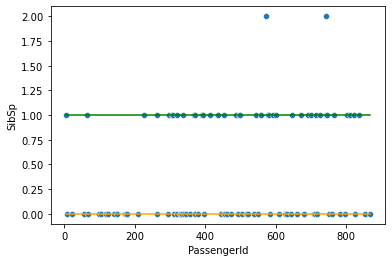

In [206]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['SibSp'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

Cambiará, por muy poco y no será significante, pero es porque no contamos en Nan

Parch

In [209]:
pl = np.percentile(data_pc['Parch'], 5)
pu = np.percentile(data_pc['Parch'], 95)
print(pl,pu)

0.0 2.0


<AxesSubplot:xlabel='PassengerId', ylabel='Parch'>

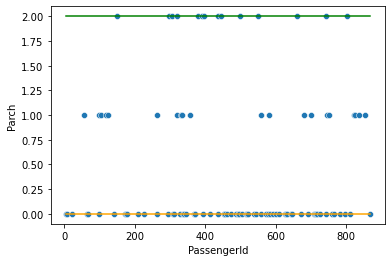

In [210]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['Parch'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

Drop values

In [211]:
df_sd = data_pc[(data_pc['Parch']>=pl) & (data_pc['Parch']<=pu)]

In [212]:
df_sd[['Parch']].describe()

,Parch
count,100.000000
mean,0.480000
std,0.731402
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [214]:
data_pc['Parch_drop'] = df_sd['Parch']

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/2911064955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Parch_drop'] = df_sd['Parch']


Cap Values

In [215]:
data_pc['Parch_pcv'] = np.where(
    data_pc['Parch']<pl,
    pl,
    np.where(
        data_pc['Parch']>pu,
        pu,
        data_pc['Parch']
    )
)

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3264061301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Parch_pcv'] = np.where(


In [216]:
data_pc[['Parch', 'Parch_pcv', 'Parch_drop']].describe()

,Parch,Parch_pcv,Parch_drop
count,100.000000,100.000000,100.000000
mean,0.480000,0.480000,0.480000
std,0.731402,0.731402,0.731402
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000


In [236]:
data_imputaciones['Parch_pcv'] = data_pc['Parch_pcv']
data_imputaciones['Parch_drop'] = data_pc['Parch_drop']

In [218]:
data_pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_pct,Age_drop,Age_pcv,Parch_drop,Parch_pcv
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,35.0,35.0,35.0,0.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,54.0,54.0,54.0,0.0,0.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,34.0,34.0,34.0,0.0,0.0
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,61.0,65.0,61.0,1.0,1.0
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,45.0,45.0,45.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.50,B69,S,52.0,52.0,52.0,1.0,1.0
172,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.48,E121,S,27.0,27.0,27.0,1.0,1.0
173,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.16,E49,C,39.0,39.0,39.0,1.0,1.0
174,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0.0,1.0,PC 17592,39.40,D28,S,16.0,16.0,16.0,1.0,1.0


Fare

In [219]:
pl = np.percentile(data_pc['Fare'], 5)
pu = np.percentile(data_pc['Fare'], 95)
print(pl,pu)

12.48 154.0305


<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

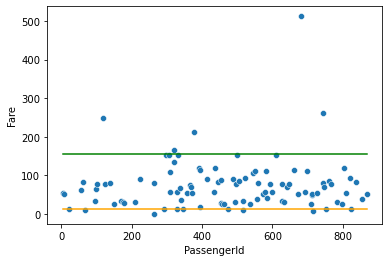

In [220]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['Fare'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

Drop values

In [221]:
df_sd = data_pc[(data_pc['Fare']>=pl) & (data_pc['Fare']<=pu)]

In [222]:
df_sd[['Fare']].describe()

,Fare
count,91.000000
mean,66.124066
std,36.887319
min,12.480000
25%,33.760000
50%,57.980000
75%,86.500000
max,153.460000


In [223]:
data_pc['Fare_drop'] = df_sd['Fare']

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3495820727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Fare_drop'] = df_sd['Fare']


Cap values

In [224]:
data_pc['Fare_pcv'] = np.where(
    data_pc['Fare']<pl,
    pl,
    np.where(
        data_pc['Fare']>pu,
        pu,
        data_pc['Fare']
    )
)

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3708651722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Fare_pcv'] = np.where(


In [225]:
data_pc[['Fare', 'Fare_pcv', 'Fare_drop']].describe()

,Fare,Fare_pcv,Fare_drop
count,100.000000,100.000000,91.000000
mean,74.445400,68.373625,66.124066
std,65.975312,41.694304,36.887319
min,0.000000,12.480000,12.480000
25%,31.990000,31.990000,33.760000
50%,59.980000,59.980000,57.980000
75%,90.000000,90.000000,86.500000
max,512.330000,154.030500,153.460000


In [238]:
data_imputaciones['Fare_pcv'] = data_pc['Fare_pcv']
data_imputaciones['Fare_drop'] = data_pc['Fare_drop']

# 5.	Al comparar los métodos del inciso 4 contra “titanic.csv”, ¿Qué método (para cada columna) se acerca más a la realidad y por qué?

In [226]:
data_limpia = pd.read_csv('titanic.csv')
data_limpia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


COLUMNA AGE:

In [239]:
data_imputaciones.head()

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,...,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_pcv,Age_drop,Parch_pcv,Parch_drop,Fare_pcv,Fare_drop
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,...,39.0,1.0,0.0,73.27,35.0,35.0,0.0,0.0,53.10,53.10
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,0.0,46.76,54.0,54.0,0.0,0.0,51.86,51.86
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
data_limpia[['Age']].describe()

,Age
count,183.000000
mean,35.674426
std,15.643866
min,0.920000
25%,24.000000
50%,36.000000
75%,47.500000
max,80.000000


In [240]:
data_imputaciones[['Age_mean', 'Age_mode', 'Age_median', 'age_lm', 'Age_pcv', 'Age_drop']].describe()

,Age_mean,Age_mode,Age_median,age_lm,Age_pcv,Age_drop
count,183.000000,183.000000,183.000000,100.000000,100.000000,100.000000
mean,35.689891,34.092896,35.663934,36.130000,36.302500,36.120000
std,14.525802,15.073341,14.525949,8.267809,13.703558,15.121915
min,1.000000,1.000000,1.000000,11.000000,13.850000,1.000000
25%,25.000000,24.000000,25.000000,31.000000,24.000000,24.000000
50%,35.690000,31.000000,35.500000,38.000000,36.000000,36.000000
75%,46.500000,46.500000,46.500000,43.000000,48.250000,48.250000
max,80.000000,80.000000,80.000000,50.000000,61.000000,71.000000


Para este análisis, veremos punto por punto, con comentarios generales entre columnas y algunos a columnas en específico: 
- count: la cantidad de valores cambio con respecto a la data real, sólo con las columnas de la regresión lineal y el proceso de outliders de percentiles. Esto debido a que estos dós modelos necesitan trabajar con data completa y no pueden quedar con cantidad de datos distintos, en el lado de las variables para predecir la variable independiente.  
- mean: La media si representó un cambio en cada modelo. En el caso de la imputación por la media, fue el cambio más ligero, junto a la imputación por la mediana. Esto porque son valores muy parecidos, que puede que no cambien mucho la información de la data. En el caso de la moda, llega a sesgar la data y por ende, la media termina ciendo bastante alejada en comparación a la que se mantiene en realidad.  En el caso de la regresión lineal, conssidero que se pueden obtener buenos resultados en términos de la media, porque al contar con 83 datos menos, la media no se pasó por mucho. Para los percentiles, cuando eliminamos los valores que pasan los percentiles que creamos, vemos que puede mantener una buena similitud, esto en el caso de análisis más específicos. Al momento dehacer el cap, la media se mantiene cerca, puede que haya crecido porque pudo haber eliminado valores mínimos que afecten mucho la media, pero se mantiene valaores cercanos para hacer un análisis más específico. 
- Desviasión estándar: La desviasión si se perdió bastante en cualquier caso, sea imputación o una regresión o los outliders. En tema de las imputaciones, es porque modifícan el comportamiento de la data, puede que al ser  sólo por media, moda y mediana, la manera de mantener un poco el comportamientod de los datos no sea tan preciso. Por otro lado, las regresiones y outliders por perder datos, ssu desviación se ve afectada bastante.
- Minimos, máximo: En el caso de las imputaciones, no hay mucho cambio en estos valores, se da más en 50% y 75% de los datos, ya que obtiene nuevos valores que se repiten y modifican el comportamiento de los datos.  En el caso de la regresion y outliders, si cambian bastante porque cuentan con menos datos, algunos los dejamos al lado y los sustituye por un valor en específico. Tomar en cuenta que estos modelos eliminan toda fila que contenga un nan que involucre el modelo. 

Para la edad, el modelo que más se acerca al comportamiento de la data real parece ser: la imputación por la media, ya que no mueve mucho la desviasión estandar y mantiene la media bastante cercana a la realidad, contando con la misma cantidad de dato. 

COLUMNA SIBSP

In [247]:
data_limpia[['SibSp']].describe()

,SibSp
count,183.000000
mean,0.464481
std,0.644159
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [249]:
data_imputaciones[['SibSp_mean', 'SibSp_mode', 'SibSp_median', 'SibSp_lm']].describe()

,SibSp_mean,SibSp_mode,SibSp_median,SibSp_lm
count,183.000000,183.000000,183.000000,100.000000
mean,0.453552,0.453552,0.453552,0.460000
std,0.643459,0.643459,0.643459,0.500908
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,1.000000


Para este análisis, veremos punto por punto, con comentarios generales entre columnas y algunos a columnas en específico: 
- count: En este caso, sólo la regresión lineal requirió la eliminación de nan, que llevo a que contase con menos valores. NO se hizo outliders, porque es probable que no modifique nada y no se pueda hacer un análisis más importante, no agrega valor. 
- mean: En este caso, todos los modelos mantienen la media de manera bastante parecida, por lo que los 4 modelos puedes ser una buena fuente de información que puede acercarse a la realidad. Eso se da, debido a los valores de la data, que cuenta con valores de 0 a 3, pero la mayoría es entre 0 y 1. 
- Desviasión estándar: La desviaciones estándar práctivamente no se mueven entre los modelos y en realición a la realidad son bastantes acertados, no parece que se sesge la data o que se modifique el comportamiento de la misma.
- Minimos, máximo: Cuenan con valores de 0 a 3 en todas imputaicones, execpto en la regresión lineal, debido a los nan, pero aún así mantiene los otros valores muy parecidos. 

En este caso, por la particularidad de la data, que parece ser que desde un principio los valores sosn muy repetitivos y no cuenta con valores atípicos que no muevan mucho los valores importantes, la imputación de cualquier tipo puede ser útil, se dejaría de último de esas imputaciones la moda, porque puede a largo plazo sesgar la data demasiado. La regresión, parece que demuestra el punto, cuenta con menos datos, con un min max distinto y aún así los datos estadísticos son bastante parecidos. 

COLUMNA PARCH

In [251]:
data_limpia[['Parch']].describe()

,Parch
count,183.000000
mean,0.475410
std,0.754617
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


In [252]:
data_imputaciones[['Parch_mean', 'Parch_mode', 'Parch_median', 'Parch_lm', 'Parch_pcv', 'Parch_drop']].describe()

,Parch_mean,Parch_mode,Parch_median,Parch_lm,Parch_pcv,Parch_drop
count,183.000000,183.000000,183.000000,100.00000,100.000000,100.000000
mean,0.431694,0.431694,0.431694,0.42000,0.480000,0.480000
std,0.737147,0.737147,0.737147,0.60603,0.731402,0.731402
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,4.000000,4.000000,4.000000,3.00000,2.000000,2.000000


Para este análisis, veremos punto por punto, con comentarios generales entre columnas y algunos a columnas en específico: 
- count: La cantidad de datos en los modelos de imputación se mantuvo, mientras que la regresión lineal y los outliders necesitaban que no hubiesen nan, para poder seleccionar la data dentro de los márgenes establecidos por los percentiles y la posibilidad de que el modelo de regresión pueda hacer su análisis sin problema. 
- mean: en la media el comportamiento de las imputaciones es bastante parecido entre ellos, pero si se aleja un poco de los valores reales. Mientras que en laa regresión linal si parece que al perder datos, si pierde mucho en comparación a los valores reales. En tema de outliders, como cuentan del 5 percentil al 95, abarca lo suficiente, para tener un resultado cercano al real y con menos datos. 
- Desviasión estándar: En este caso, todos quedaron con desviaciones bastante cercanas al original, salvo la regresión lineal, por lo que sería el modelo más cuestionable en este punto. 
- Minimos, máximo: Las imputaciones lo mantienen, la regresión al perder valores, perdió el valor más grande, dado que su fila no estuviese completamente limpia. De igual forma los outliderss, a mierden el maximo, pero la mayoría de variables estadísticas las mantiene muy parecidas, no como la regresión lineal. 

Para este caso, la data original no se comportó de forma tan cerrada como en el caso de SibSp, por lo que permitió que no sólo los modelos de imputación tuviesen buenos resultados. En este caso depende de qué se desea analizar,  hay diferente método a usar, si nos importa mucho la media, el modelo de percentiles es más cercano, al igual que con la desviasión estándar. Esto si no importace la cantidad de datos, ahora si requerimos que esten la misma cantidad de datos, entonces, utilizamos las imputaciones, pero tomar en cuenta que la media si varia, pero la desviación estandar es bastante buena. 

COLUMNA FARE

In [253]:
data_limpia[['Fare']].describe()

,Fare
count,183.000000
mean,78.682469
std,76.347843
min,0.000000
25%,29.700000
50%,57.000000
75%,90.000000
max,512.329200


In [254]:
data_imputaciones[['Fare_mean', 'Fare_mode', 'Fare_median', 'Fare_lm', 'Fare_pcv', 'Fare_drop']].describe()

,Fare_mean,Fare_mode,Fare_median,Fare_lm,Fare_pcv,Fare_drop
count,183.000000,183.000000,183.000000,100.00000,100.000000,91.000000
mean,78.959399,76.668251,77.996339,74.44570,68.373625,66.124066
std,75.314437,76.077081,75.449742,39.24106,41.694304,36.887319
min,0.000000,0.000000,0.000000,-39.38000,12.480000,12.480000
25%,30.000000,26.550000,30.000000,55.95750,31.990000,33.760000
50%,61.180000,55.440000,56.930000,67.66500,59.980000,57.980000
75%,90.000000,90.000000,90.000000,98.32000,90.000000,86.500000
max,512.330000,512.330000,512.330000,169.46000,154.030500,153.460000


Para este análisis, veremos punto por punto, con comentarios generales entre columnas y algunos a columnas en específico: 
- count: En temaas de la cantidad de datos, manetemos el hecho de que la regresión y los outliders se mantienen con 83 datos menos. Por lo que llega a afectar en el resultado de sus estadísticos. 
- mean: Para la media vemos algo bastante importante, si usamos la media, esta se mantiene. En el caso de la moda, podemos intuir que el valor que más se repite, parese ser bajo, por lo que jala la media hacia abajo. La mediana no mueve mucho el valor de la media como la moda, pero si se aleja en comparación con la media. Para la regresión, tenemos un problema, porque perdemos valores y por lo tanto a tener una desviación estándar tan grande la data original, se pierde la media. Algo parecido para con los outliders, los valores atípicos, si jalan mucho la media, cosa que se pierden con el cap y drop. 
- Desviasión estándar: Es bastante alta la de la data real, y al menos con las imputaciones se quedan bastante cercan, pero la regresión lineal y los outliders pierden muchos valores, que demistran que estos son atípicos y que modifican mucho la desviasión como la media. 
- Minimos, máximo: Los valores que estan desde el mínimo hasta el 75% se mantienen estables, pero vemos un buen cambio en los valores máximos en el caso de la regresión y los outliders. La regresión pudise no presentarse de esta forma, pero al contar con muchos nan, se pierde información. 

La mejor forma de verlo es identificar que queremos realizar, porque al menos con la data que se cuenta, el modelo que puede ayudar a que se entienda mejor la data y se podría acercar más a la realidad son los outliders, pero al perder mucha información por los nan, es un modelo que queda descartado. Por otro lado, las imputaciones mantienen buenos resultados, si nos importa la media, entonces media o mediana son buenas opciones. Si no importa mucho la media o mantenerla, la moda nos dará una señal de cómo estuvieron las entradas. 

COLUMNA SEX

In [257]:
data_limpia[['Sex']].describe()

,Sex
count,183
unique,2
top,male
freq,95


In [258]:
data_imputaciones[['Sex_mode']].describe()

,Sex_mode
count,183
unique,2
top,male
freq,119


En este caso, debido a que es una variable de tipo string, se analizan diferentes tipos de métricas: 
- Count: mantiene la misma cantidad el modelo, con la imputación 
- Unique: no requiere crear un nuevo valor, porque utiliza el que más se repite. 
- Top/freq: si tomamos esto, como el valor y la cantidad de veces que se encuentra en la columna, podemos ver que con el uso de la moda, llegamos a sesgar la data, porque aumentamos los valores del valor que más se repite. 

Si se usa la moda, cumplimos con limpiar los datos nan, pero al ser variable de clasificación, sesgamos la data al usar la moda como método de imputación. Una idea, sería hacer mejor una imputación sectorizada, que tome otros factores para escoger que valor poner y así puede que de un resultado menos sesgado. 

COLUMNA EMBARKED

In [259]:
data_limpia[['Embarked']].describe()

,Embarked
count,183
unique,3
top,S
freq,116


In [260]:
data_imputaciones[['Embarked_mode']].describe()

,Embarked_mode
count,183
unique,3
top,S
freq,122


En este caso, debido a que es una variable de tipo string, se analizan diferentes tipos de métricas: 
- Count: mantiene la misma cantidad el modelo, con la imputación por la moda. 
- Unique: no requiere crear un nuevo valor, porque utiliza el que más se repite. Y mantuvo los 3 unique valores
- Top/freq: si tomamos esto, como el valor y la cantidad de veces que se encuentra en la columna, se repite el caso en donde aumentamos esa frequencia y mantenemos una data algo sesgada, puede que en este caso el aumento de la freq no es bastante en comparación al caso anterior, pero es por cómo eran los missing values.

Al contar con pocos missing values, puede que el modelo de imputación por la moda sea algo que no moleste mucho en el análisis, pero siempre sería recomentable para el casos de variables de categoría, hacer una imputación sectorizada que permita que la moda no aumente descabelladamente. 

# 6.	Conclusiones (10%) 

Con estos modelos utilizados, podemos entrar al punto en donde:
- Para hacer regresiones, se requiere que haya pocos missing values en la data, ya que si hay muchos, estos modelos de predicción pueden perder presición por la falta de información. 
- Las imputaciones mantienen valores muy cercanos a la data real, pero se debe de tener cuidado que se puede llegar a sesgar la data si no se maneja de la mejor forma. Porque depende de qué tanto ya está sesgada la data y la cantiadad de valores que puede tener. Por otro lado, este no elimina los valores atípicos que pueden mover la media y la desviasión. 
- Si se quiere hacer un buen análisis, mejor usar outliders, pero que no pierdan mucha data por los missing values, ya que con ello podrán eliminar data que este modificando las métricas por ser valores atípicos o que generemos mucha recuencia fuera de los márgenes que se requiran en los estudios. 

# Parte 2:

In [261]:
data_imputaciones.head()

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,...,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_pcv,Age_drop,Parch_pcv,Parch_drop,Fare_pcv,Fare_drop
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,...,39.0,1.0,0.0,73.27,35.0,35.0,0.0,0.0,53.10,53.10
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,0.0,46.76,54.0,54.0,0.0,0.0,51.86,51.86
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a.	Standarization

In [262]:
from sklearn.preprocessing import StandardScaler

In [263]:
scaler = StandardScaler()
df_z = data_imputaciones.copy()
for col in df_z.select_dtypes(include=['float', 'int']).columns:
    df_z[col+'_z'] = scaler.fit_transform(df_z[[col]])

In [264]:
df_z.head()

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,...,age_lm_z,SibSp_lm_z,Parch_lm_z,Fare_lm_z,Age_pcv_z,Age_drop_z,Parch_pcv_z,Parch_drop_z,Fare_pcv_z,Fare_drop_z
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.348878,1.083473,-0.696526,-0.030112,-0.095527,-0.074438,-0.65958,-0.65958,-0.368169,-0.355033
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.078240,-0.922958,-0.696526,-0.709083,1.297959,1.188347,-0.65958,-0.65958,-0.398060,-0.388835
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df_z.describe()

,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,...,age_lm_z,SibSp_lm_z,Parch_lm_z,Fare_lm_z,Age_pcv_z,Age_drop_z,Parch_pcv_z,Parch_drop_z,Fare_pcv_z,Fare_drop_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.100000e+01
mean,35.689891,34.092896,35.663934,0.453552,0.453552,0.453552,0.431694,0.431694,0.431694,78.959399,...,-3.264056e-16,8.215650e-17,7.771561e-17,-7.271961e-17,-1.548761e-16,1.726397e-16,4.551914e-17,4.551914e-17,-1.071365e-16,-1.305427e-16
std,14.525802,15.073341,14.525949,0.643459,0.643459,0.643459,0.737147,0.737147,0.737147,75.314437,...,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005540e+00
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.054812e+00,-9.229582e-01,-6.965260e-01,-2.915292e+00,-1.646697e+00,-2.334157e+00,-6.595797e-01,-6.595797e-01,-1.347311e+00,-1.462325e+00
25%,25.000000,24.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,...,-6.236046e-01,-9.229582e-01,-6.965260e-01,-4.735178e-01,-9.022823e-01,-8.055235e-01,-6.595797e-01,-6.595797e-01,-8.770243e-01,-8.822373e-01
50%,35.690000,31.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.180000,...,2.273179e-01,-9.229582e-01,-6.965260e-01,-1.736666e-01,-2.218577e-02,-7.975480e-03,-6.595797e-01,-6.595797e-01,-2.023276e-01,-2.220054e-01
75%,46.500000,46.500000,46.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,...,8.351196e-01,1.083473e+00,9.618693e-01,6.114660e-01,8.762461e-01,8.061881e-01,7.145446e-01,7.145446e-01,5.213020e-01,5.554435e-01
max,80.000000,80.000000,80.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,512.330000,...,1.686042e+00,1.083473e+00,4.278660e+00,2.433496e+00,1.811349e+00,2.318206e+00,2.088669e+00,2.088669e+00,2.064752e+00,2.380758e+00


b. MinMaxScaling

In [266]:
from sklearn.preprocessing import MinMaxScaler

In [273]:
scaler = MinMaxScaler()
df_norm = data_imputaciones.copy()
for col in df_norm.select_dtypes(include=['float', 'int']).columns:
    df_norm[col+'_norm'] = scaler.fit_transform(df_norm[[col]])

In [274]:
df_norm.head()

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,...,age_lm_norm,SibSp_lm_norm,Parch_lm_norm,Fare_lm_norm,Age_pcv_norm,Age_drop_norm,Parch_pcv_norm,Parch_drop_norm,Fare_pcv_norm,Fare_drop_norm
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.717949,1.0,0.0,0.539408,0.448568,0.485714,0.0,0.0,0.286965,0.288126
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.871795,0.0,0.0,0.412469,0.851538,0.757143,0.0,0.0,0.278205,0.279330
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
df_norm.describe()

,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,...,age_lm_norm,SibSp_lm_norm,Parch_lm_norm,Fare_lm_norm,Age_pcv_norm,Age_drop_norm,Parch_pcv_norm,Parch_drop_norm,Fare_pcv_norm,Fare_drop_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,91.000000
mean,35.689891,34.092896,35.663934,0.453552,0.453552,0.453552,0.431694,0.431694,0.431694,78.959399,...,0.644359,0.460000,0.140000,0.545038,0.476193,0.501714,0.240000,0.240000,0.394867,0.380508
std,14.525802,15.073341,14.525949,0.643459,0.643459,0.643459,0.737147,0.737147,0.737147,75.314437,...,0.211995,0.500908,0.202010,0.187900,0.290637,0.216027,0.365701,0.365701,0.294554,0.261649
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,24.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,...,0.512821,0.000000,0.000000,0.456510,0.215270,0.328571,0.000000,0.000000,0.137831,0.150943
50%,35.690000,31.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.180000,...,0.692308,0.000000,0.000000,0.512569,0.469777,0.500000,0.000000,0.000000,0.335569,0.322741
75%,46.500000,46.500000,46.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,...,0.820513,1.000000,0.333333,0.659356,0.729586,0.675000,0.500000,0.500000,0.547649,0.525039
max,80.000000,80.000000,80.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,512.330000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c. MaxAbsScaler

In [276]:
from sklearn.preprocessing import MaxAbsScaler

In [287]:
scaler = MaxAbsScaler()
df_MabsS = data_imputaciones.copy()
for col in df_MabsS.select_dtypes(include=['float', 'int']).columns:
    df_MabsS[col+'_MabsS'] = scaler.fit_transform(df_MabsS[[col]])

In [288]:
df_MabsS.head()

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,...,age_lm_MabsS,SibSp_lm_MabsS,Parch_lm_MabsS,Fare_lm_MabsS,Age_pcv_MabsS,Age_drop_MabsS,Parch_pcv_MabsS,Parch_drop_MabsS,Fare_pcv_MabsS,Fare_drop_MabsS
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.78,1.0,0.0,0.432373,0.573770,0.492958,0.0,0.0,0.344737,0.346019
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.90,0.0,0.0,0.275935,0.885246,0.760563,0.0,0.0,0.336687,0.337938
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
df_MabsS.describe()

,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,...,age_lm_MabsS,SibSp_lm_MabsS,Parch_lm_MabsS,Fare_lm_MabsS,Age_pcv_MabsS,Age_drop_MabsS,Parch_pcv_MabsS,Parch_drop_MabsS,Fare_pcv_MabsS,Fare_drop_MabsS
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,91.000000
mean,35.689891,34.092896,35.663934,0.453552,0.453552,0.453552,0.431694,0.431694,0.431694,78.959399,...,0.722600,0.460000,0.140000,0.439311,0.595123,0.508732,0.240000,0.240000,0.443897,0.430888
std,14.525802,15.073341,14.525949,0.643459,0.643459,0.643459,0.737147,0.737147,0.737147,75.314437,...,0.165356,0.500908,0.202010,0.231565,0.224648,0.212985,0.365701,0.365701,0.270689,0.240371
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.220000,0.000000,0.000000,-0.232385,0.227049,0.014085,0.000000,0.000000,0.081023,0.081324
25%,25.000000,24.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,...,0.620000,0.000000,0.000000,0.330211,0.393443,0.338028,0.000000,0.000000,0.207686,0.219992
50%,35.690000,31.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.180000,...,0.760000,0.000000,0.000000,0.399298,0.590164,0.507042,0.000000,0.000000,0.389403,0.377818
75%,46.500000,46.500000,46.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,...,0.860000,1.000000,0.333333,0.580196,0.790984,0.679577,0.500000,0.500000,0.584300,0.563665
max,80.000000,80.000000,80.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,512.330000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2.	Compare los estadísticos que considere más importantes para su conclusión y compare contra la data completa de “titanic.csv” (deberán de normalizar también). 

a.	Standarization

In [291]:
data_limpia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [292]:
scaler = StandardScaler()
df_z_limpio = data_limpia.copy()
for col in df_z_limpio.select_dtypes(include=['float', 'int']).columns:
    df_z_limpio[col+'_z'] = scaler.fit_transform(df_z_limpio[[col]])

In [293]:
df_z_limpio.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_z,Survived_z,Pclass_z,Age_z,SibSp_z,Parch_z,Fare_z
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1.840135,0.698430,-0.372256,0.149065,0.833628,-0.631730,-0.097180
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1.832017,0.698430,-0.372256,-0.043230,0.833628,-0.631730,-0.335997
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,-1.819841,-1.431782,-0.372256,1.174636,-0.723044,-0.631730,-0.352250
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,-1.803606,0.698430,3.520480,-2.030273,0.833628,0.697081,-0.814070
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,-1.799547,0.698430,-0.372256,1.431029,-0.723044,-0.631730,-0.684702


In [317]:
df_z_limpio[['Age_z','SibSp_z', 'Parch_z', 'Fare_z']].describe()

,Age_z,SibSp_z,Parch_z,Fare_z
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,-1.559166e-16,-7.522823e-17,-1.092023e-17,9.585532e-17
std,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,-2.227696e+00,-7.230443e-01,-6.317298e-01,-1.033406e+00
25%,-7.483096e-01,-7.230443e-01,-6.317298e-01,-6.433299e-01
50%,2.086869e-02,-7.230443e-01,-6.317298e-01,-2.847750e-01
75%,7.579979e-01,8.336275e-01,6.970812e-01,1.486431e-01
max,2.841189e+00,3.946971e+00,4.683514e+00,5.695465e+00


In [310]:
df_z[['Age_mean_z', 'Age_mode_z', 'Age_median_z', 'Age_pcv_z', 'Age_drop_z', 'age_lm_z']].describe()

,Age_mean_z,Age_mode_z,Age_median_z,Age_pcv_z,Age_drop_z,age_lm_z
count,1.830000e+02,1.830000e+02,1.830000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-3.800780e-17,-2.147645e-16,-9.848110e-17,-1.548761e-16,1.726397e-16,-3.264056e-16
std,1.002743e+00,1.002743e+00,1.002743e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.394709e+00,-2.201482e+00,-2.392892e+00,-1.646697e+00,-2.334157e+00,-3.054812e+00
25%,-7.379433e-01,-6.714229e-01,-7.361440e-01,-9.022823e-01,-8.055235e-01,-6.236046e-01
50%,7.544468e-06,-2.057528e-01,-1.131659e-02,-2.218577e-02,-7.975480e-03,2.273179e-01
75%,7.462422e-01,8.253739e-01,7.480265e-01,8.762461e-01,8.061881e-01,8.351196e-01
max,3.058810e+00,3.053938e+00,3.060571e+00,1.811349e+00,2.318206e+00,1.686042e+00


In [314]:
df_z[['SibSp_mean_z', 'SibSp_mode_z', 'SibSp_median_z', 'SibSp_lm_z']].describe()

,SibSp_mean_z,SibSp_mode_z,SibSp_median_z,SibSp_lm_z
count,1.830000e+02,1.830000e+02,1.830000e+02,1.000000e+02
mean,3.033396e-17,3.033396e-17,3.033396e-17,8.215650e-17
std,1.002743e+00,1.002743e+00,1.002743e+00,1.005038e+00
min,-7.067991e-01,-7.067991e-01,-7.067991e-01,-9.229582e-01
25%,-7.067991e-01,-7.067991e-01,-7.067991e-01,-9.229582e-01
50%,-7.067991e-01,-7.067991e-01,-7.067991e-01,-9.229582e-01
75%,8.515651e-01,8.515651e-01,8.515651e-01,1.083473e+00
max,3.968293e+00,3.968293e+00,3.968293e+00,1.083473e+00


In [315]:
df_z[['Parch_mean_z', 'Parch_mode_z', 'Parch_median_z', 'Parch_pcv_z', 'Parch_drop_z', 'Parch_lm_z']].describe()

,Parch_mean_z,Parch_mode_z,Parch_median_z,Parch_pcv_z,Parch_drop_z,Parch_lm_z
count,1.830000e+02,1.830000e+02,1.830000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.092023e-17,1.092023e-17,1.092023e-17,4.551914e-17,4.551914e-17,7.771561e-17
std,1.002743e+00,1.002743e+00,1.002743e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-5.872348e-01,-5.872348e-01,-5.872348e-01,-6.595797e-01,-6.595797e-01,-6.965260e-01
25%,-5.872348e-01,-5.872348e-01,-5.872348e-01,-6.595797e-01,-6.595797e-01,-6.965260e-01
50%,-5.872348e-01,-5.872348e-01,-5.872348e-01,-6.595797e-01,-6.595797e-01,-6.965260e-01
75%,7.730686e-01,7.730686e-01,7.730686e-01,7.145446e-01,7.145446e-01,9.618693e-01
max,4.853979e+00,4.853979e+00,4.853979e+00,2.088669e+00,2.088669e+00,4.278660e+00


In [316]:
df_z[['Fare_mean_z', 'Fare_mode_z', 'Fare_median_z', 'Fare_pcv_z', 'Fare_drop_z', 'Fare_lm_z']].describe()

,Fare_mean_z,Fare_mode_z,Fare_median_z,Fare_pcv_z,Fare_drop_z,Fare_lm_z
count,1.830000e+02,1.830000e+02,1.830000e+02,1.000000e+02,9.100000e+01,1.000000e+02
mean,8.372174e-17,4.368091e-17,6.673472e-17,-1.071365e-16,-1.305427e-16,-7.271961e-17
std,1.002743e+00,1.002743e+00,1.002743e+00,1.005038e+00,1.005540e+00,1.005038e+00
min,-1.051273e+00,-1.010535e+00,-1.036588e+00,-1.347311e+00,-1.462325e+00,-2.915292e+00
25%,-6.518500e-01,-6.605899e-01,-6.378818e-01,-8.770243e-01,-8.822373e-01,-4.735178e-01
50%,-2.367166e-01,-2.798016e-01,-2.799762e-01,-2.023276e-01,-2.220054e-01,-1.736666e-01
75%,1.469956e-01,1.757208e-01,1.595313e-01,5.213020e-01,5.554435e-01,6.114660e-01
max,5.769937e+00,5.742294e+00,5.772389e+00,2.064752e+00,2.380758e+00,2.433496e+00


En la imputaciones de una forma, los valores cambiarion con el hecho de min hasta max, es decir, parece que la desviación de los valores se alejan de la media. Pero vemos que algunos es porque de por sí cambio la media. Este análisis se puede ver cómo la idea de que, estas imputaciones si cambian de una forma más clara el comportamiento de la data. Los modelos de regresión lineal, outliders de cap y drop, generan medias más alejadas, pero parece que las desviaciones standar con respecto a la media, son más controladas. 

b. MinMaxScaling

In [334]:
scaler = MinMaxScaler()
df_MMS_limpio = data_limpia.copy()
for col in df_MMS_limpio.select_dtypes(include=['float', 'int']).columns:
    df_MMS_limpio[col+'_MINMAX'] = scaler.fit_transform(df_MMS_limpio[[col]])

In [336]:
df_MMS_limpio[['Age_MINMAX','SibSp_MINMAX', 'Parch_MINMAX', 'Fare_MINMAX']].describe()

,Age_MINMAX,SibSp_MINMAX,Parch_MINMAX,Fare_MINMAX
count,183.000000,183.000000,183.000000,183.000000
mean,0.439484,0.154827,0.118852,0.153578
std,0.197823,0.214720,0.188654,0.149021
min,0.000000,0.000000,0.000000,0.000000
25%,0.291856,0.000000,0.000000,0.057971
50%,0.443601,0.000000,0.000000,0.111257
75%,0.589024,0.333333,0.250000,0.175668
max,1.000000,1.000000,1.000000,1.000000


In [337]:
df_norm[['Age_mean_norm', 'Age_mode_norm', 'Age_median_norm', 'Age_pcv_norm', 'Age_drop_norm', 'age_lm_norm']].describe()

,Age_mean_norm,Age_mode_norm,Age_median_norm,Age_pcv_norm,Age_drop_norm,age_lm_norm
count,183.000000,183.000000,183.000000,100.000000,100.000000,100.000000
mean,0.439113,0.418897,0.438784,0.476193,0.501714,0.644359
std,0.183871,0.190802,0.183873,0.290637,0.216027,0.211995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.303797,0.291139,0.303797,0.215270,0.328571,0.512821
50%,0.439114,0.379747,0.436709,0.469777,0.500000,0.692308
75%,0.575949,0.575949,0.575949,0.729586,0.675000,0.820513
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [325]:
df_norm[['SibSp_mean_norm', 'SibSp_mode_norm', 'SibSp_median_norm', 'SibSp_lm_norm']].describe()

,SibSp_mean_norm,SibSp_mode_norm,SibSp_median_norm,SibSp_lm_norm
count,183.000000,183.000000,183.000000,100.000000
mean,0.151184,0.151184,0.151184,0.460000
std,0.214486,0.214486,0.214486,0.500908
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.333333,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [326]:
df_norm[['Parch_mean_norm', 'Parch_mode_norm', 'Parch_median_norm', 'Parch_pcv_norm', 'Parch_drop_norm', 'Parch_lm_norm']].describe()

,Parch_mean_norm,Parch_mode_norm,Parch_median_norm,Parch_pcv_norm,Parch_drop_norm,Parch_lm_norm
count,183.000000,183.000000,183.000000,100.000000,100.000000,100.000000
mean,0.107923,0.107923,0.107923,0.240000,0.240000,0.140000
std,0.184287,0.184287,0.184287,0.365701,0.365701,0.202010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.500000,0.500000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
df_norm[['Fare_mean_norm', 'Fare_mode_norm', 'Fare_median_norm', 'Fare_pcv_norm', 'Fare_drop_norm', 'Fare_lm_norm']].describe()

,Fare_mean_norm,Fare_mode_norm,Fare_median_norm,Fare_pcv_norm,Fare_drop_norm,Fare_lm_norm
count,183.000000,183.000000,183.000000,100.000000,91.000000,100.000000
mean,0.154118,0.149646,0.152238,0.394867,0.380508,0.545038
std,0.147004,0.148492,0.147268,0.294554,0.261649,0.187900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058556,0.051822,0.058556,0.137831,0.150943,0.456510
50%,0.119415,0.108212,0.111120,0.335569,0.322741,0.512569
75%,0.175668,0.175668,0.175668,0.547649,0.525039,0.659356
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Con el caso de los mixmax, podemos ver que al reducir la data en un rango de 0-1, podemos ver lo fuertes que son los datos atípicos en cierto tipo de columnas, más específicamente en Fare. Aquí los modelos de outliders o linear regresión, tuvieron la caracterísitica de eliminar los valores atípicos, y presentaron esta normalización más controlada. En el caso de Parch, vemos que mucha data esta por debajo del 75%, sin importar el modelo, algo que se mantuvo en lad data original. Con minmax podemos ver mejor el comportamiento de la data que cuenta con muchos valores repetidos y cómo los atípicos mueven la media, etc. Y Aquellos con data muy dispersa es mejor para entender sus resultados.